In [ ]:
import keras
import time
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from scipy.io import loadmat

In [ ]:
#loading data
trX = loadmat('train_32x32.mat')['X']
trY = loadmat('train_32x32.mat')['y']
tsX = loadmat('test_32x32.mat')['X']
tsY = loadmat('test_32x32.mat')['y']

In [ ]:
#normalising data
inp_trX=np.array(trX)
norm_trX=(inp_trX-np.min(inp_trX))/np.ptp(inp_trX)

inp_tsX=np.array(tsX)
norm_tsX=(inp_tsX-np.min(inp_tsX))/np.ptp(inp_tsX)


In [ ]:
print(norm_trX)
print(norm_tsX)


[[[[0.12941176 0.11764706 0.14901961]
   [0.05882353 0.09019608 0.0745098 ]
   [0.05882353 0.06666667 0.0745098 ]
   ...
   [0.28235294 0.25490196 0.21960784]
   [0.32156863 0.30196078 0.22352941]
   [0.34901961 0.30980392 0.23137255]]

  [[0.10980392 0.15294118 0.1372549 ]
   [0.05490196 0.09803922 0.08627451]
   [0.05490196 0.07843137 0.06666667]
   ...
   [0.15686275 0.15294118 0.19607843]
   [0.2627451  0.22745098 0.20392157]
   [0.3254902  0.30588235 0.23529412]]

  [[0.15686275 0.16078431 0.14901961]
   [0.07058824 0.08235294 0.10196078]
   [0.0627451  0.06666667 0.09019608]
   ...
   [0.09019608 0.11372549 0.17647059]
   [0.1372549  0.16470588 0.17254902]
   [0.28235294 0.27058824 0.20784314]]

  ...

  [[0.3372549  0.31764706 0.29411765]
   [0.34117647 0.32156863 0.27843137]
   [0.32156863 0.30980392 0.25490196]
   ...
   [0.40784314 0.40784314 0.34117647]
   [0.40784314 0.41176471 0.31764706]
   [0.40392157 0.41176471 0.30588235]]

  [[0.32941176 0.3372549  0.25098039]
   [0.3

In [ ]:
print(norm_trX.shape)
print(encoded_trY.shape)
print(norm_tsX.shape)
print(encoded_tsY.shape)

(73257, 32, 32, 3)
(73257, 10)
(26032, 32, 32, 3)
(26032, 10)


In [ ]:
#encoding the labels using one-hot vector encoding
trY = array(trY)
# one hot encode
encoded_trY = to_categorical(trY)
print(encoded_trY)
tsY = array(tsY)
# one hot encode
encoded_tsY = to_categorical(tsY)
print(encoded_tsY)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
#building the model as per given CNN architecture
model = Sequential()
#adding convolutional layer
model.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(32,32,3),strides=(1,1),padding='same'))
#adding maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
#adding convolutional layer
model.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(32,32,3),strides=(1,1),padding='same'))
#adding maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
#adding convolutional layer
model.add(Conv2D(128, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(32,32,3),strides=(1,1),padding='same'))
#flattening the output before passing to the fully connected layer
model.add(Flatten())
#adding fully connected layers
model.add(Dense(3072, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
#training the model with Stochastic Gradient Descent Optimizer on training set and testing on test data
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

graph_val= model.fit(norm_trX, encoded_trY, 
          batch_size=128, epochs = 20, validation_data = (norm_tsX, encoded_tsY))

result = model.evaluate(norm_tsX, encoded_tsY)
print('Test loss:', result[0])
print('Test accuracy:', result[1])

Epoch 1/20
573/573 [==============================] - 11s 19ms/step - loss: 1.0037e-04 - accuracy: 1.0000 - val_loss: 0.7711 - val_accuracy: 0.9112
Epoch 2/20
573/573 [==============================] - 10s 18ms/step - loss: 7.1201e-05 - accuracy: 1.0000 - val_loss: 0.7726 - val_accuracy: 0.9114
Epoch 3/20
573/573 [==============================] - 10s 18ms/step - loss: 1.3794e-04 - accuracy: 0.9999 - val_loss: 0.7762 - val_accuracy: 0.9114
Epoch 4/20
573/573 [==============================] - 11s 18ms/step - loss: 7.5923e-05 - accuracy: 1.0000 - val_loss: 0.7808 - val_accuracy: 0.9115
Epoch 5/20
573/573 [==============================] - 11s 18ms/step - loss: 8.9938e-05 - accuracy: 1.0000 - val_loss: 0.7822 - val_accuracy: 0.9115
Epoch 6/20
573/573 [==============================] - 11s 19ms/step - loss: 6.8473e-05 - accuracy: 1.0000 - val_loss: 0.7817 - val_accuracy: 0.9112
Epoch 7/20
573/573 [==============================] - 11s 19ms/step - loss: 1.0215e-04 - accuracy: 1.0000 - val_

In [ ]:
#Assigning the loss values to x and y
graph_val.history
x=graph_val.history['loss']
y=graph_val.history['val_loss']


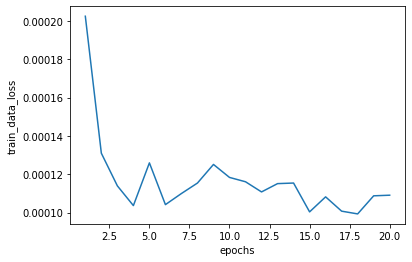

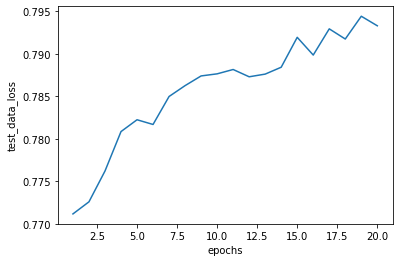

In [ ]:
epochs = []
for i in range(1,len(x)+1):
  epochs.append(i)
#plotting graphs
plt.plot(epochs,x)
plt.xlabel('epochs')
plt.ylabel('train_data_loss')
plt.show()
plt.plot(epochs,y)
plt.xlabel('epochs')
plt.ylabel('test_data_loss')
plt.show()